
## <center>Comparative Analysis of Recurrent Neural Network (RNN) and Long Short-Term Memory (LSTM) Models in Predicting Tesla Stock Movements</center>

#### *AIM:*
The objective of the Project is to compare the performance of RNN model and LSTM model on Tesla Stocks Data inorder to predict the performance of Tesla Stocks movements.

#### *Overview of Simple RNN and LSTM:<BR>*
>RNN stands for Recurrent Neural Networks. RNN is used when we have sequential data. SimpleRNN is a Function that is provided by Tensorflow, Keras. It is a fully-connected RNN where the output is fed back as input. RNN is used for Time Series Forecasting.<br>
    Long Short-Term Memory (LSTM) is a type of recurrent neural network (RNN) that can store information for a long time and use it for future calculations

#### *Dataset Overview:<br>*
>The dataset used in this project is sourced from Kaggle and contains historical stock data for Tesla Inc(06/29/2010 to 03/17/2017.). The primary goal of this analysis is to predict the future movements of Tesla's stock prices using advanced deep learning techniques—specifically, Recurrent Neural Networks (RNN) and Long Short-Term Memory (LSTM) models.<BR>
Recurrent neural networks have the feature of taking the output of the same artificial neuron as the input again. The Neural Network takes the first 50 observations and then uses regression to predict the 51st observation. The process continues for predicting the 52nd observation and so on. This method is also called Autoregression.
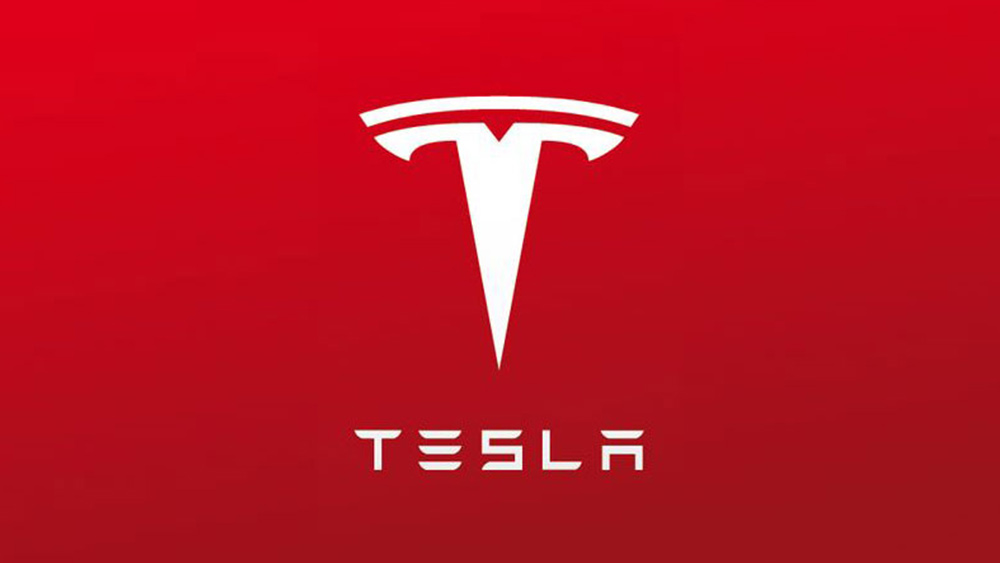

 
#### *Attributes of the Dataset:<br>*

>Date: The trading date for the stock.<br>
Open: The price of Tesla's stock at the beginning of the trading day.<br>
High: The highest price reached during the trading day.<br>
Low: The lowest price reached during the trading day.<br>
Close: The price of Tesla's stock at the end of the trading day.<br>
Volume: The number of shares traded during the day.<br>
Adj Close: The closing price adjusted for dividends, stock splits, and other corporate actions.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
import os

# Load and preprocess the data
df = pd.read_csv('Tesla_stocks.csv', parse_dates=['Date'])
print(df.head())
print(df.info())




        Date       Open   High        Low      Close    Volume  Adj Close
0 2010-06-29  19.000000  25.00  17.540001  23.889999  18766300  23.889999
1 2010-06-30  25.790001  30.42  23.299999  23.830000  17187100  23.830000
2 2010-07-01  25.000000  25.92  20.270000  21.959999   8218800  21.959999
3 2010-07-02  23.000000  23.10  18.709999  19.200001   5139800  19.200001
4 2010-07-06  20.000000  20.00  15.830000  16.110001   6866900  16.110001
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1692 non-null   datetime64[ns]
 1   Open       1692 non-null   float64       
 2   High       1692 non-null   float64       
 3   Low        1692 non-null   float64       
 4   Close      1692 non-null   float64       
 5   Volume     1692 non-null   int64         
 6   Adj Close  1692 non-null   float64       
dtypes: datetime64[ns](1), 

In [2]:
train_length = round(len(df) * 0.7)
lg = len(df)
val_length = lg - train_length

print('Total observations:', lg)
print('Training set:', train_length)
print('Validation set:', val_length)



Total observations: 1692
Training set: 1184
Validation set: 508


>Target variable:"Open"

In [3]:
train_data = df['Open'][:train_length]
val_data = df['Open'][train_length:]

In [4]:
train_data

0        19.000000
1        25.790001
2        25.000000
3        23.000000
4        20.000000
           ...    
1179    199.210007
1180    194.389999
1181    188.460007
1182    191.149994
1183    193.750000
Name: Open, Length: 1184, dtype: float64

In [5]:
val_data

1184    188.949997
1185    192.000000
1186    195.429993
1187    194.960007
1188    202.000000
           ...    
1687    244.820007
1688    246.110001
1689    257.000000
1690    262.399994
1691    264.000000
Name: Open, Length: 508, dtype: float64

In [6]:
# Normalize the data
scaler = MinMaxScaler()
train = train_data.values.reshape(-1,1) 
scaled_trainset = scaler.fit_transform(train)



The 'Open' prices are normalized using the MinMaxScaler from scikit-learn, scaling the values between 0 and 1

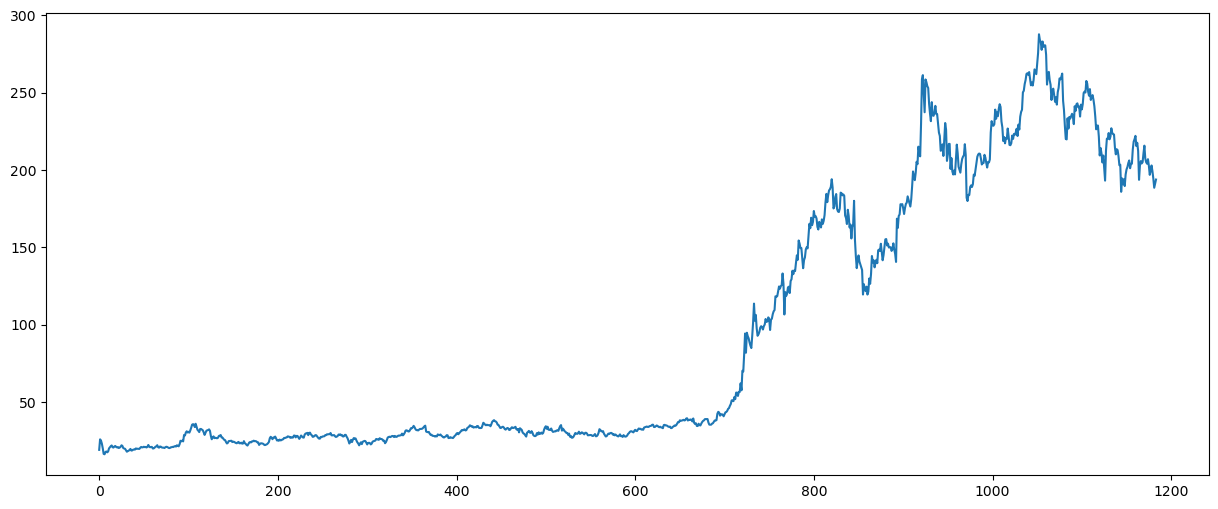

In [7]:

# Plot the training data
plt.subplots(figsize=(15, 6))
plt.plot(train)
plt.show()

>X-Axis: The x-axis represents the time steps or the index of the data points in the dataset. Since train is the reshaped array of the 'Open' prices for the training set, the x-axis will range from 0 to the length of the train dataset minus 1. Each point on the x-axis corresponds to a specific day in the training set.

>Y-Axis: The y-axis represents the 'Open' prices of Tesla stock. These are the actual values taken from the dataset, so the y-axis will show the range of 'Open' prices over the training period.

In [8]:
# Prepare the training data
x_train, y_train = [], []
step = 50
for i in range(step, train_length):
    x_train.append(scaled_trainset[i - step:i, 0])
    y_train.append(scaled_trainset[i, 0])
X_train, y_train = np.array(x_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1)): Reshapes X_train to the format required by the RNN model (samples, time steps, features)

In [9]:
# Define and compile the Simple RNN model
simple_rnn_model = Sequential()
simple_rnn_model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
simple_rnn_model.add(Dropout(0.2))
simple_rnn_model.add(SimpleRNN(units=50, return_sequences=True))
simple_rnn_model.add(Dropout(0.2))
simple_rnn_model.add(SimpleRNN(units=50))
simple_rnn_model.add(Dropout(0.2))
simple_rnn_model.add(Dense(units=1))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
simple_rnn_model.compile(optimizer='adam', loss='mean_squared_error')
simple_rnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 50, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# Evaluate the models on the validation set
val = val_data.values.reshape(-1, 1)
scaled_valset = scaler.transform(val)

In [12]:
x_val, y_val = [], []
for i in range(step, val_length):
    x_val.append(scaled_valset[i - step:i, 0])
    y_val.append(scaled_valset[i, 0])
X_val, y_val = np.array(x_val), np.array(y_val)
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))


In [13]:
from tensorflow.keras.callbacks import EarlyStopping
# Train the Simple RNN model
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history_rnn = simple_rnn_model.fit(X_train, y_train, epochs=100, batch_size=32,validation_data=(X_val, y_val),callbacks=[early_stopping])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - loss: 0.3495 - val_loss: 0.0056
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.1076 - val_loss: 0.0417
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0615 - val_loss: 0.0051
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0485 - val_loss: 0.0060
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0368 - val_loss: 0.0024
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0313 - val_loss: 0.0252
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0250 - val_loss: 0.0104
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0209 - val_loss: 0.0085
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0171 - val_loss: 0.0113
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0178 - val_loss: 0.0027
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0130 - val_loss: 0.0042
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step

In [20]:
# Predictions with Simple RNN model
y_pred_rnn = simple_rnn_model.predict(X_train)
y_pred_rnn



36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


array([[0.01283112],
       [0.01560825],
       [0.01594125],
       ...,
       [0.67336977],
       [0.658713  ],
       [0.6660514 ]], dtype=float32)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Simple RNN Model - Mean Squared Error (Normalized): 0.0007031234065158993
Simple RNN Model - Root Mean Squared Error: 0.026516474247454153
Simple RNN Model - R-squared: 0.9250105799679686


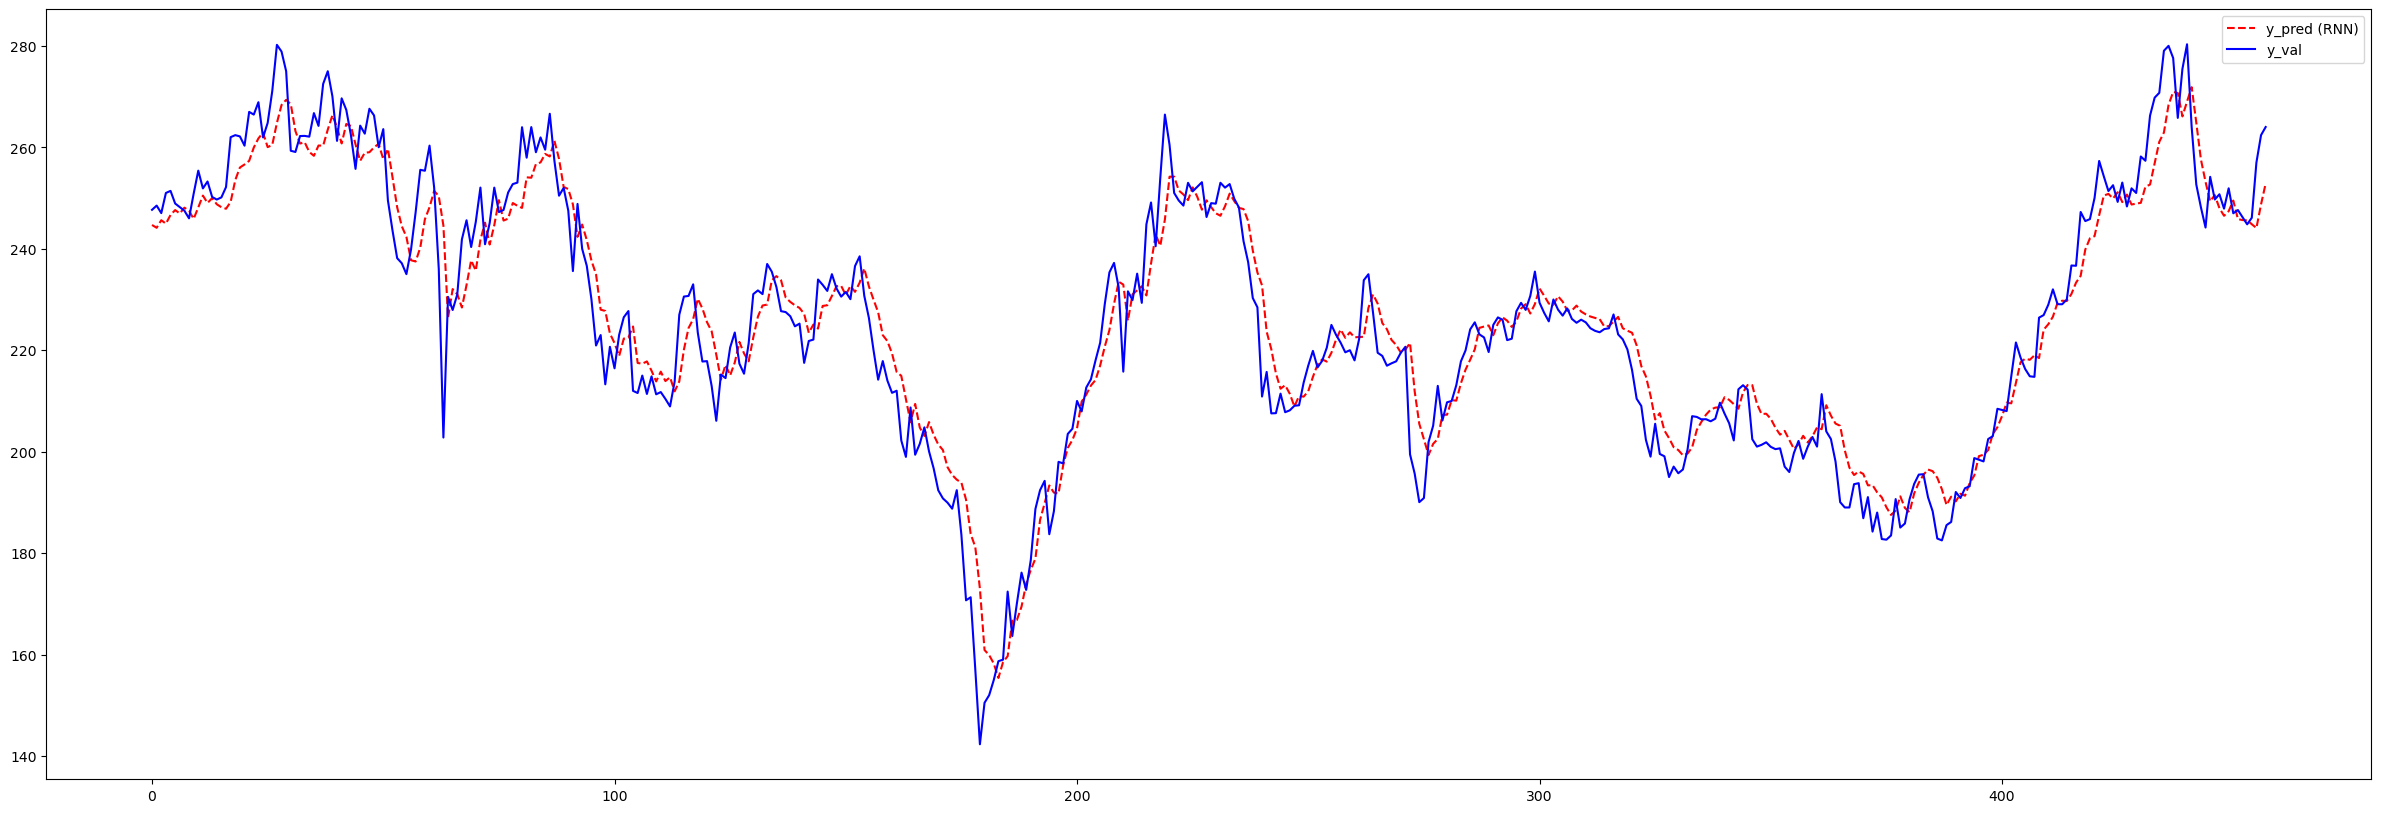

In [15]:
# Predictions on the validation set with Simple RNN model
y_pred_val_rnn = simple_rnn_model.predict(X_val)  # Predictions should be on X_val (not X_train)

# Inverse transform the predictions and true values for plotting and interpretation
y_pred_val_rnn_inv = scaler.inverse_transform(y_pred_val_rnn)  # Inverse transform for plotting
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))  # Inverse transform for plotting

# For normalized MSE (scaled data) without applying inverse transformation for evaluation
mse_rnn = mean_squared_error(y_val, y_pred_val_rnn)  # Use normalized (scaled) values
rmse_rnn = np.sqrt(mse_rnn)
r2_rnn = r2_score(y_val, y_pred_val_rnn)
print(f'Simple RNN Model - Mean Squared Error (Normalized): {mse_rnn}')
print(f'Simple RNN Model - Root Mean Squared Error: {rmse_rnn}')
print(f'Simple RNN Model - R-squared: {r2_rnn}')

# Plot the results of the Simple RNN model (on the original scale)
plt.figure(figsize=(30, 10))
plt.plot(y_pred_val_rnn_inv, label='y_pred (RNN)', linestyle='--', color='red')
plt.plot(y_val_inv, label='y_val', color='blue')
plt.legend()
plt.show()

In [16]:
from keras.layers import  LSTM
from tensorflow.keras.callbacks import EarlyStopping
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

history_lstm = lstm_model.fit(
    X_train, y_train, 
    epochs=200, 
    batch_size=32, 
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)



C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 9s 82ms/step - loss: 0.0525 - val_loss: 0.0075
Epoch 2/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0051 - val_loss: 0.0036
Epoch 3/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0037 - val_loss: 0.0034
Epoch 4/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 5/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0038 - val_loss: 0.0051
Epoch 6/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 7/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 8/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0032 - val_loss: 0.0040
Epoch 9/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 10/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 11/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0038 - val_loss: 0.0029
Epoch 12/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step

In [21]:
# Predictions with LSTM model
y_pred_lstm = lstm_model.predict(X_train)
y_pred_lstm


36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step


array([[0.02252018],
       [0.02311951],
       [0.02339613],
       ...,
       [0.67340153],
       [0.65514827],
       [0.6517335 ]], dtype=float32)

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Length of y_val: 458
Length of y_pred_val_lstm: 458
LSTM Model - Mean Squared Error (Normalized): 0.0005343741501960676
LSTM Model - Root Mean Squared Error: 0.023116534130272808
LSTM Model - R-squared: 0.9430080022483129


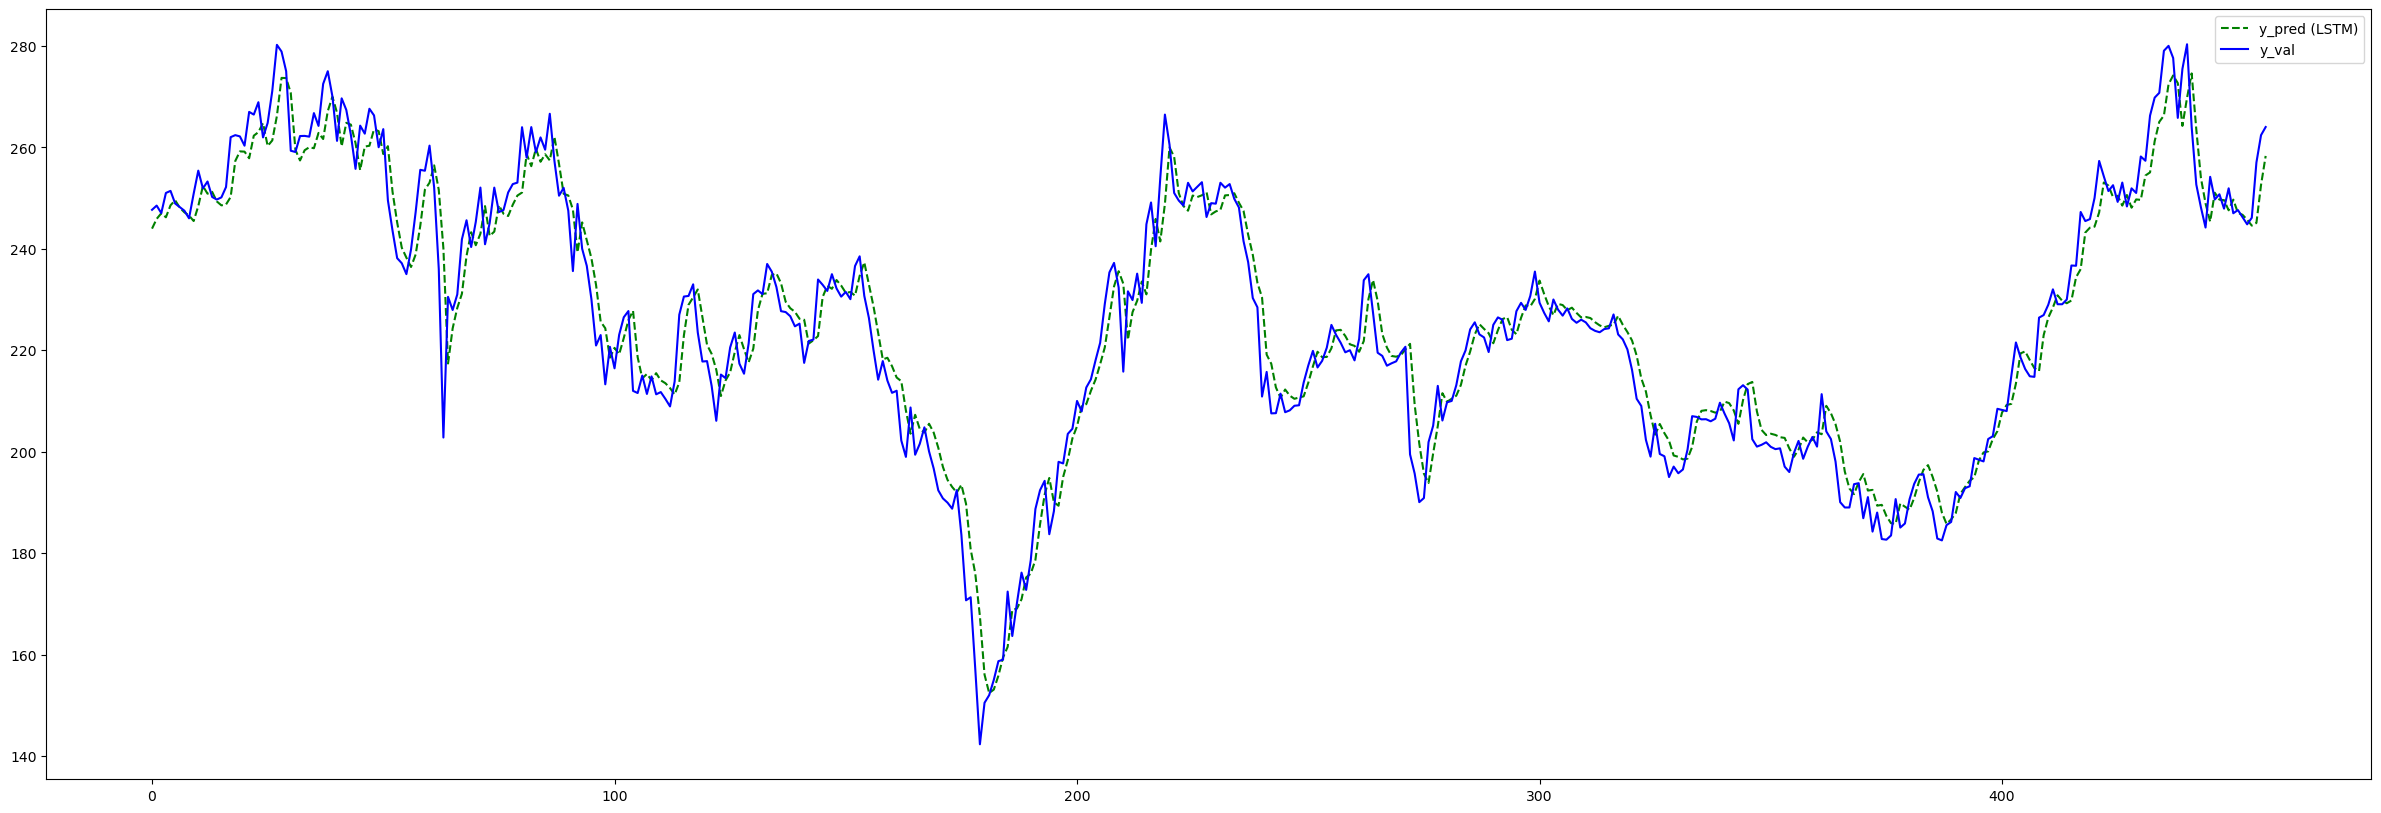

In [18]:
# Predictions on the validation set with LSTM model
y_pred_val_lstm = lstm_model.predict(X_val)  # Predictions should be on X_val (not X_train)

# Check if the lengths match (for validation purposes)
print(f"Length of y_val: {len(y_val)}")
print(f"Length of y_pred_val_lstm: {len(y_pred_val_lstm)}")

# Inverse transform the predictions and true values for plotting and interpretation
y_pred_val_lstm_inv = scaler.inverse_transform(y_pred_val_lstm)  # Inverse transform for plotting
y_val_inv = scaler.inverse_transform(y_val.reshape(-1, 1))  # Inverse transform for plotting

# For normalized MSE (scaled data) without applying inverse transformation for evaluation
mse_lstm = mean_squared_error(y_val, y_pred_val_lstm)  # Use normalized (scaled) values
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_val, y_pred_val_lstm)
print(f'LSTM Model - Mean Squared Error (Normalized): {mse_lstm}')
print(f'LSTM Model - Root Mean Squared Error: {rmse_lstm}')
print(f'LSTM Model - R-squared: {r2_lstm}')

# Plot the results of the LSTM model (on the original scale)
plt.figure(figsize=(30, 10))
plt.plot(y_pred_val_lstm_inv, label='y_pred (LSTM)', linestyle='--', color='green')
plt.plot(y_val_inv, label='y_val', color='blue')
plt.legend()
plt.show()


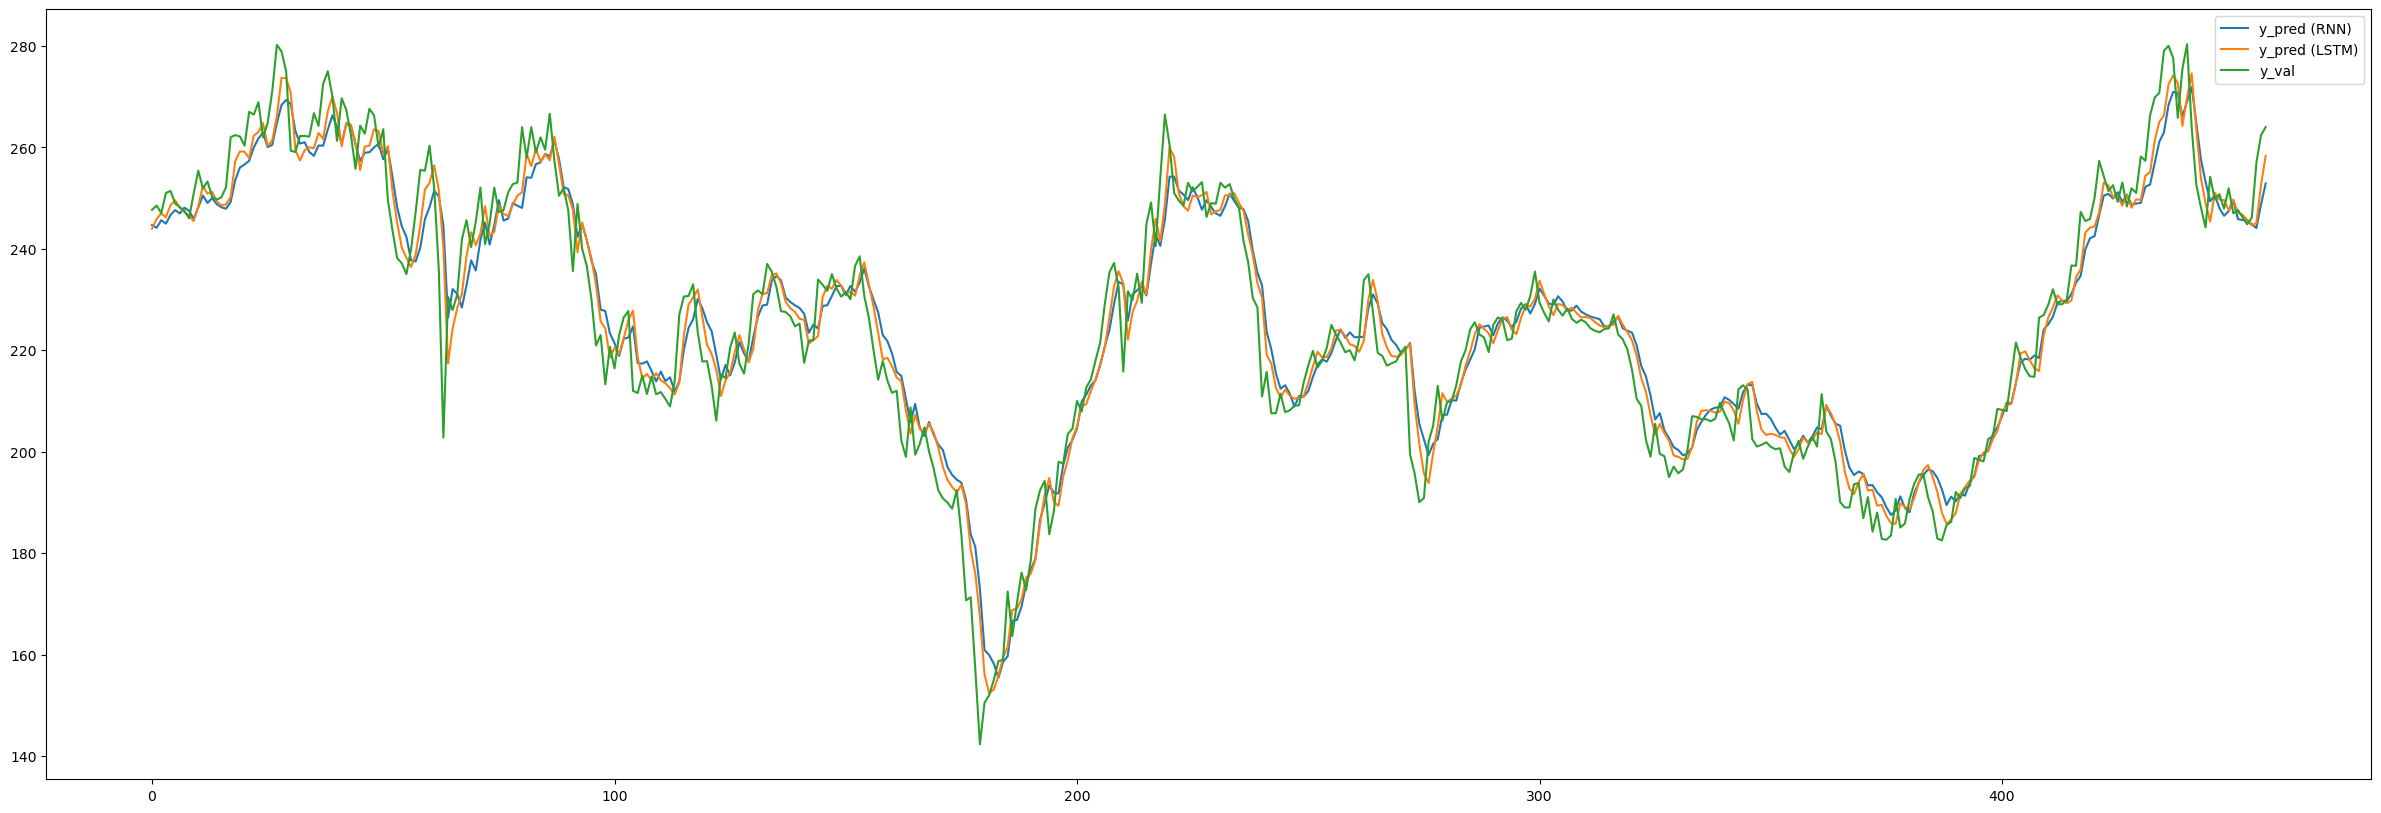

In [19]:
# Plot and compare the results
plt.figure(figsize=(30, 10))
plt.plot(y_pred_val_rnn_inv, label='y_pred (RNN)')
plt.plot(y_pred_val_lstm_inv, label='y_pred (LSTM)')
plt.plot(y_val_inv, label='y_val')
plt.legend()
plt.show()

### Conclusion:
>Prediction Accuracy: The LSTM model outperforms the Simple RNN model in terms of prediction accuracy. This is evidenced by the lower Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) values observed for the LSTM model. Specifically, the LSTM model achieved an MSE of 0.000534 compared to 0.000703 for the Simple RNN, and an RMSE of 0.0231 compared to 0.0265 for the Simple RNN. These results suggest that the LSTM model was more effective in minimizing prediction errors.


>Model Performance (R-squared): The R-squared value further supports the superior performance of the LSTM model. With an R-squared value of 0.941, the LSTM model explains approximately 94% of the variance in the Tesla stock prices. In contrast, the Simple RNN model has an R-squared value of 0.922, explaining around 92% of the variance. Although both models exhibit strong performance, the LSTM model demonstrates a slightly better fit to the data.

>Implications of Model Selection: The improved performance of the LSTM model can be attributed to its ability to capture long-term dependencies and patterns in the time series data, which is crucial for stock price prediction. In contrast, the Simple RNN model, while effective, may struggle with learning long-term dependencies due to the vanishing gradient problem. This highlights the importance of selecting appropriate model architectures based on the specific characteristics of the data.

>Overall Conclusion: Both models provide valuable insights into Tesla stock price movements, with the LSTM model showing a clear advantage in terms of prediction accuracy and data fit. Therefore, for tasks requiring more precise and reliable stock price predictions, the LSTM model would be the preferred choice. The Simple RNN model, however, still offers a viable and less computationally intensive alternative for scenarios where a slightly lower accuracy is acceptable.







